# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.

[In this notebook you're provided with hints and brief instructions and thinking prompts. Don't ignore them as they are designed to equip you with the structure for the project and will help you analyze what you're doing on a deeper level. Before submitting your project, make sure you remove all hints and descriptions provided to you. Instead, make this report look as if you're sending it to your teammates to demonstrate your findings - they shouldn't know you had some external help from us! To help you out, we've placed the hints you should remove in square brackets.]

[Before you dive into analyzing your data, explain the purposes of the project and hypotheses you're going to test.]

## Open the data file and have a look at the general information. 



In [1]:
import pandas as pd# Loading all the libraries


data=pd.read_csv('/datasets/credit_scoring_eng.csv')# Load the data


## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

[Now let's explore our data. You'll want to see how many columns and rows it has, look at a few rows to check for potential issues with the data.]

In [2]:

print(len(data.columns))
print()
print(data.count())# Let's see how many rows and columns our dataset has



12

children            21525
days_employed       19351
dob_years           21525
education           21525
education_id        21525
family_status       21525
family_status_id    21525
gender              21525
income_type         21525
debt                21525
total_income        19351
purpose             21525
dtype: int64


In [3]:
data.head(30)# let's print the first N rows



,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


There are missing values(NaN) in colums of days_employed and total_income,we have negative values, we also have the same values written in different letters 'Secondary degree", 'SECONDARY DEGREE', column types match their values .

In [4]:
print(data.info())# Get info on data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


data types are right and logic for columns and their data. We have missing values in two columns days_employed and total_income.

In [5]:
print(data['days_employed'].isna().sum())
print(data['children'].isna().sum())
print(data['total_income'].isna().sum())# Let's look in the filtered table at the the first column with missing data



2174
0
2174



'we have the same number of NaN in total_income and days_employed, so it's seems simetric.'

In [6]:
filtered_data = data[data['days_employed'].isnull()&data['total_income'].isnull()]
print(filtered_data)


       children  days_employed  dob_years            education  education_id  \
12            0            NaN         65  secondary education             1   
26            0            NaN         41  secondary education             1   
29            0            NaN         63  secondary education             1   
41            0            NaN         50  secondary education             1   
55            0            NaN         54  secondary education             1   
...         ...            ...        ...                  ...           ...   
21489         2            NaN         47  Secondary Education             1   
21495         1            NaN         50  secondary education             1   
21497         0            NaN         48    BACHELOR'S DEGREE             0   
21502         1            NaN         42  secondary education             1   
21510         2            NaN         28  secondary education             1   

           family_status  family_status

In [7]:
is_null = data.isnull()
row_with_null = is_null.any(axis=1)
rows_with_null = data[row_with_null]# Let's investigate clients who do not have data on identified characteristic and the column with the missing values
print(rows_with_null)


       children  days_employed  dob_years            education  education_id  \
12            0            NaN         65  secondary education             1   
26            0            NaN         41  secondary education             1   
29            0            NaN         63  secondary education             1   
41            0            NaN         50  secondary education             1   
55            0            NaN         54  secondary education             1   
...         ...            ...        ...                  ...           ...   
21489         2            NaN         47  Secondary Education             1   
21495         1            NaN         50  secondary education             1   
21497         0            NaN         48    BACHELOR'S DEGREE             0   
21502         1            NaN         42  secondary education             1   
21510         2            NaN         28  secondary education             1   

           family_status  family_status

In [8]:
2174/21525*100

10.099883855981417

In [9]:
data.isnull().sum()/len(data)

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

**Intermediate conclusion**

The number of raws in the filtered table match the number of missing values.
We can see, that missing values is only 10% in total_income and days_imployed.
We will check if there some reason for symmetric NaN.

In [10]:
print(filtered_data[filtered_data.total_income.isnull()]['income_type'].unique())




['retiree' 'civil servant' 'business' 'employee' 'entrepreneur']


In [11]:
print(filtered_data[filtered_data.total_income.isnull()]['income_type'].nunique())

5


 We checked if our missing values is related to the income_type, but we see that there is no one type. 

**Possible reasons for missing values in data**

My opinion that values is missing randomly,or because accident, or bag, because in the rows_with_null we see that there are females and males, differnt values of dob_years, children, education or other.

[Let's start checking whether the missing values are random.]

In [12]:
print(data['income_type'].nunique())
print(data['income_type'].unique())


8
['employee' 'retiree' 'business' 'civil servant' 'unemployed'
 'entrepreneur' 'student' 'paternity / maternity leave']


**Intermediate conclusion**
we can see that in original data we have 8 types of income_types and in filtered 5 types, that means that we can not do correlation between NaN and income_type, it's not because they belong to the same type of employment.


**Conclusions**
we didn't find any patterns. so we suppose that missing values are accidental.
we have missing values in total_income and there we can put mean of this type of employment, or just mean of column. in column of days_employed we can not suspect how many days the person has. Because it's 10% and for now we will leave it as is.
we will check duplicates, and each column for problematic values like negative numbers,zeros, outliers, then we will fix it.

## Data transformation

[Let's go through each column to see what issues we may have in them.]

[Begin with removing duplicates and fixing educational information if required.]

In [13]:
data.duplicated().sum()

54

In [14]:
data=data.drop_duplicates().reset_index(drop=True)

In [15]:
data.duplicated().sum()

0

In [16]:

data['education'].sort_values(ascending=True).unique()# Let's see all values in education column to check if and what spellings will need to be fixed


array(["BACHELOR'S DEGREE", "Bachelor's Degree", 'GRADUATE DEGREE',
       'Graduate Degree', 'PRIMARY EDUCATION', 'Primary Education',
       'SECONDARY EDUCATION', 'SOME COLLEGE', 'Secondary Education',
       'Some College', "bachelor's degree", 'graduate degree',
       'primary education', 'secondary education', 'some college'],
      dtype=object)

In [17]:
data['education']=data['education'].str.lower()

In [18]:
print(data['education'].sort_values(ascending=True).unique())# Checking all the values in the column to make sure we fixed them
print(data.duplicated().sum())


["bachelor's degree" 'graduate degree' 'primary education'
 'secondary education' 'some college']
17


In [19]:
data=data.drop_duplicates().reset_index(drop=True)

In [20]:
print(data.duplicated().sum())

0


[Check the data the `children` column]

In [21]:
data['children'].unique()


array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [22]:
data["children"].value_counts()

 0     14091
 1      4808
 2      2052
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

 we have -1 kid in 47 raws and we have 20 children in 76 raws, if the first is impossible and probably it's mean 1 kis,we can replace it, the second we can check with the age of user who have 20 children to be sure that it's mistake, but we see that we don't have any number of children from 5 to 20, accordingly, we can immediately take 20 for an error and replace it with 2children.because we can see that the bigger the number of children, the fewer times it occurs in the table, which means that if 4children we have 41 times and 5 only 9 times, 20 children unlikely can be anything more than five, so we replace it with 2.

In [23]:
data.loc[data['children']<0, 'children'] = 1
data.loc[data['children']==20, 'children'] = 2#fix the data based on your decision]


In [24]:
data["children"].value_counts()# Checking the `children` column again to make sure it's all fixed



0    14091
1     4855
2     2128
3      330
4       41
5        9
Name: children, dtype: int64

Here we have negative values, we assume that this is an error and take them modulo.

In [25]:
data['days_employed'].sort_values(ascending=True).unique()# Find problematic data in `days_employed`, if they exist, and calculate the percentage


array([-18388.94990057, -17615.56326563, -16593.47281726, ...,
       401715.81174889, 401755.40047533,             nan])

In [26]:
data['days_employed']=abs(data['days_employed'])#we make our negative values positive

In [27]:
data['days_employed'].sort_values(ascending=True)#now it's fixed

17394    24.141633
8327     24.240695
6152     30.195337
9669     33.520665
2127     34.701045
           ...    
21418          NaN
21424          NaN
21426          NaN
21431          NaN
21439          NaN
Name: days_employed, Length: 21454, dtype: float64

In [28]:
data['dob_years'].sort_values(ascending=True).unique()# Check the `dob_years` for suspicious values and count the percentage



array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75])

In [29]:
data[data['dob_years']==0]# Address the issues in the `dob_years` column, if they exist


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,secondary education,1,married,0,F,retiree,0,11406.644,car
149,0,2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions
270,3,1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation
578,0,397856.565013,0,secondary education,1,married,0,F,retiree,0,15619.310,construction of own property
1040,0,1158.029561,0,bachelor's degree,0,divorced,3,F,business,0,48639.062,to own a car
...,...,...,...,...,...,...,...,...,...,...,...,...
19770,0,NaN,0,secondary education,1,married,0,F,employee,0,NaN,housing
20397,0,338734.868540,0,secondary education,1,married,0,F,retiree,0,41471.027,purchase of my own house
20512,0,331741.271455,0,secondary education,1,unmarried,4,F,retiree,0,20766.202,property
21110,2,108.967042,0,bachelor's degree,0,married,0,M,business,0,38512.321,building a real estate


we can susspect that 0 in the dob_years it's missing value. 
in family_status there is no problem value.

In [30]:
data["family_status"].value_counts()



married              12339
civil partnership     4151
unmarried             2810
divorced              1195
widow / widower        959
Name: family_status, dtype: int64

in column gender we see one strange variable, that doesn't affect on our research so we leave it

In [31]:
data['gender'].value_counts()# Let's see the values in the column

F      14174
M       7279
XNA        1
Name: gender, dtype: int64

In [32]:
data[data['gender']=='XNA']# Address the problematic values, if they exist. So there is some wrong data or mistake

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10684,0,2358.600502,24,some college,2,civil partnership,1,XNA,business,0,32624.825,buy real estate


[Now let's check the `income_type` column. See what kind of values there are and what problems you may need to address]

In [33]:
data['income_type'].value_counts()# Let's see the values in the column

employee                       11084
business                        5078
retiree                         3829
civil servant                   1457
entrepreneur                       2
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

 i checked duplicates in the beggining and dropped it, because wanted to work already with clean data and despite the fact that we do not have an ID and we cannot be sure that these are different people, we don't need duplicate here, because thay are less then one percent 

In [34]:
data.duplicated().sum()# Checking duplicates



0

In [35]:
54/21525 #percent of duplicate in original data to whole data

0.0025087108013937282

In [36]:
data.info()# Check the size of the dataset that you now have after your first manipulations with it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21454 entries, 0 to 21453
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21454 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21454 non-null  int64  
 3   education         21454 non-null  object 
 4   education_id      21454 non-null  int64  
 5   family_status     21454 non-null  object 
 6   family_status_id  21454 non-null  int64  
 7   gender            21454 non-null  object 
 8   income_type       21454 non-null  object 
 9   debt              21454 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21454 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


# Working with missing values

### Restoring missing values in `total_income`

we have missing values in two columns, in total_income and days_employed,we will try to insert their values with the columns in which values exist and their ratios.

see the grafic(for this I will add two libraries) we can not determinate connection between total_income and dob_years, there are no specific age categories. but we can look at the 'income_type' and 'total_income' dependency graph and calculate the median for each type of employment and put it in the missing values. We will use median because salary is not a liniear value for age or type of employment , so we will take the median. also i think do median for each type of employment more correctly than median by age or something else.


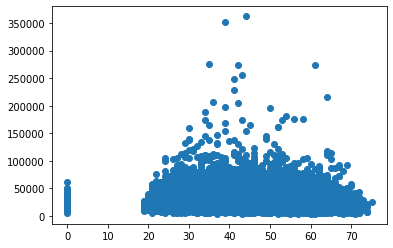

In [37]:
import numpy as np
import matplotlib.pyplot as plt
#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

plt.scatter(data['dob_years'], data['total_income'])


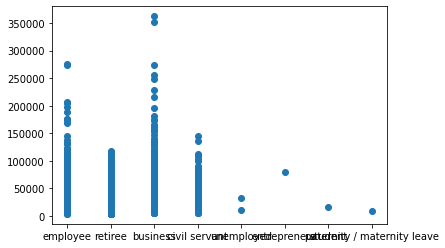

In [38]:
plt.scatter(data['income_type'],data['total_income'])
#now we can create a function that finds out the median of each income_type and then a function that inserts the median into the missing values depending on the income_type

In [39]:
data['total_income1']=data['total_income']
data['total_income2']=data['total_income']

In [40]:
grouped_data1=data.groupby(['income_type'])['total_income'].median()
grouped_data1

income_type
business                       27577.2720
civil servant                  24071.6695
employee                       22815.1035
entrepreneur                   79866.1030
paternity / maternity leave     8612.6610
retiree                        18962.3180
student                        15712.2600
unemployed                     21014.3605
Name: total_income, dtype: float64

In [41]:
grouped_data1_dict=pd.Series(grouped_data1).to_dict()
grouped_data1_dict

{'business': 27577.272,
 'civil servant': 24071.6695,
 'employee': 22815.103499999997,
 'entrepreneur': 79866.103,
 'paternity / maternity leave': 8612.661,
 'retiree': 18962.318,
 'student': 15712.26,
 'unemployed': 21014.360500000003}

In [42]:
grouped_data1_dict['business']

27577.272

In [43]:
grouped_data1_dict.values() #values in our dictionary is mean of total_income for each income_type

dict_values([27577.272, 24071.6695, 22815.103499999997, 79866.103, 8612.661, 18962.318, 15712.26, 21014.360500000003])

In [44]:
grouped_data1_dict.keys() #keys in dictionary is our income_type

dict_keys(['business', 'civil servant', 'employee', 'entrepreneur', 'paternity / maternity leave', 'retiree', 'student', 'unemployed'])

In [45]:
data[data['total_income1'].isna()] #see that now total_income1 is empty

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income1,total_income2
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,NaN,NaN
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education,NaN,NaN
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate,NaN,NaN
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase,NaN,NaN
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21418,2,NaN,47,secondary education,1,married,0,M,business,0,NaN,purchase of a car,NaN,NaN
21424,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony,NaN,NaN
21426,0,NaN,48,bachelor's degree,0,married,0,F,business,0,NaN,building a property,NaN,NaN
21431,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate,NaN,NaN


In [46]:
data['total_income1']=data['total_income1'].fillna(data.income_type.map(grouped_data1_dict))#fill our new column total_income1 with values from dictionary.

In [47]:
grouped_data1_dict['business'] 

27577.272

In [48]:
data.loc[12] #we check column with missing value in total_income, and see that now in total_income it has median for retiree
#We see that our total_income1 has been replaced with 18962.318 which is the mean total_income for income_type retiree

children                              0
days_employed                       NaN
dob_years                            65
education           secondary education
education_id                          1
family_status         civil partnership
family_status_id                      1
gender                                M
income_type                     retiree
debt                                  0
total_income                        NaN
purpose               to have a wedding
total_income1                 18962.318
total_income2                       NaN
Name: 12, dtype: object

In [49]:
data.loc[11]#we check the raw with not missing value in total income, to be sure it is ok.

children                                     0
days_employed                       792.701887
dob_years                                   40
education                  secondary education
education_id                                 1
family_status                          married
family_status_id                             0
gender                                       F
income_type                           employee
debt                                         0
total_income                         12331.077
purpose             buy commercial real estate
total_income1                        12331.077
total_income2                        12331.077
Name: 11, dtype: object

In [50]:
data[data['total_income1'].isna()] #we see that we don't have NaN in 'total_income1' so we filled it with dict.

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income1,total_income2


In [51]:
data['total_income2'] = data['total_income'].fillna(data.groupby('income_type')['total_income'].transform('median'))
#here we use transform method for this we created  column with name 'days_employed2'

In [52]:
data.loc[12]#we can see in total_income2 the same value with total_income1

children                              0
days_employed                       NaN
dob_years                            65
education           secondary education
education_id                          1
family_status         civil partnership
family_status_id                      1
gender                                M
income_type                     retiree
debt                                  0
total_income                        NaN
purpose               to have a wedding
total_income1                 18962.318
total_income2                 18962.318
Name: 12, dtype: object

###  Restoring values in `days_employed`

Let's build the grafic, which shows us the ratio between days_employed(with missing values) and income_type, because most likely the number of working days depends on the type of employment, and not on age,children or marital status, but let's see. Here we will use the same method as with total_income

In [53]:
data.days_employed.describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

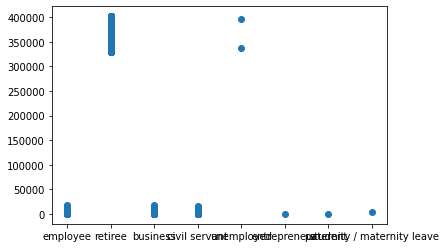

In [54]:
plt.scatter(data['income_type'], data['days_employed'])

In [55]:
grouped_data=data.groupby(['income_type'])['days_employed'].mean()
grouped_data

income_type
business                         2111.524398
civil servant                    3399.896902
employee                         2326.499216
entrepreneur                      520.848083
paternity / maternity leave      3296.759962
retiree                        365003.491245
student                           578.751554
unemployed                     366413.652744
Name: days_employed, dtype: float64

In [56]:
data['days_employed1']=data['days_employed']

In [57]:
grouped_data2=data.groupby(['income_type'])['days_employed'].mean()
grouped_data2

income_type
business                         2111.524398
civil servant                    3399.896902
employee                         2326.499216
entrepreneur                      520.848083
paternity / maternity leave      3296.759962
retiree                        365003.491245
student                           578.751554
unemployed                     366413.652744
Name: days_employed, dtype: float64

In [58]:
grouped_data2_dict=pd.Series(grouped_data2).to_dict()
grouped_data2_dict

{'business': 2111.5243982977295,
 'civil servant': 3399.896901695746,
 'employee': 2326.4992159718063,
 'entrepreneur': 520.8480834953765,
 'paternity / maternity leave': 3296.7599620220594,
 'retiree': 365003.49124486075,
 'student': 578.7515535382181,
 'unemployed': 366413.65274420456}

In [59]:
grouped_data2_dict['student']

578.7515535382181

In [60]:
grouped_data1_dict.values()

dict_values([27577.272, 24071.6695, 22815.103499999997, 79866.103, 8612.661, 18962.318, 15712.26, 21014.360500000003])

In [61]:
grouped_data1_dict.keys()

dict_keys(['business', 'civil servant', 'employee', 'entrepreneur', 'paternity / maternity leave', 'retiree', 'student', 'unemployed'])

In [62]:
data[data['days_employed1'].isna()] 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income1,total_income2,days_employed1
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,18962.3180,18962.3180,NaN
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education,24071.6695,24071.6695,NaN
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate,18962.3180,18962.3180,NaN
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase,24071.6695,24071.6695,NaN
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding,18962.3180,18962.3180,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21418,2,NaN,47,secondary education,1,married,0,M,business,0,NaN,purchase of a car,27577.2720,27577.2720,NaN
21424,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony,22815.1035,22815.1035,NaN
21426,0,NaN,48,bachelor's degree,0,married,0,F,business,0,NaN,building a property,27577.2720,27577.2720,NaN
21431,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate,22815.1035,22815.1035,NaN


In [63]:
data['days_employed1']=data['days_employed1'].fillna(data.income_type.map(grouped_data2_dict))

In [64]:
grouped_data2_dict['business'] 

2111.5243982977295

In [65]:
data.loc[12]

children                              0
days_employed                       NaN
dob_years                            65
education           secondary education
education_id                          1
family_status         civil partnership
family_status_id                      1
gender                                M
income_type                     retiree
debt                                  0
total_income                        NaN
purpose               to have a wedding
total_income1                 18962.318
total_income2                 18962.318
days_employed1            365003.491245
Name: 12, dtype: object

In [66]:
data.loc[11]

children                                     0
days_employed                       792.701887
dob_years                                   40
education                  secondary education
education_id                                 1
family_status                          married
family_status_id                             0
gender                                       F
income_type                           employee
debt                                         0
total_income                         12331.077
purpose             buy commercial real estate
total_income1                        12331.077
total_income2                        12331.077
days_employed1                      792.701887
Name: 11, dtype: object

In [67]:
data[data['days_employed1'].isna()] #we see that we don't have NaN in 'days_employed1' so we filled it

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income1,total_income2,days_employed1


In [68]:
data['days_employed2'] = data['days_employed'].fillna(data.groupby('income_type')['days_employed'].transform('mean'))
#here we use transform method for this we created  column with name 'days_employed2'

In [69]:
data.loc[12]#we can see in days_employed2 the same value with days_employed1

children                              0
days_employed                       NaN
dob_years                            65
education           secondary education
education_id                          1
family_status         civil partnership
family_status_id                      1
gender                                M
income_type                     retiree
debt                                  0
total_income                        NaN
purpose               to have a wedding
total_income1                 18962.318
total_income2                 18962.318
days_employed1            365003.491245
days_employed2            365003.491245
Name: 12, dtype: object

## Categorization of data

Begin with categorizing of purpose column. we see similar queries in different formulations.we will highlight the unique ones and formulate the main requests from them.

After we will categorize age column, let's take 0-18(it will be our group with missing values),if we see the importance of age in other groups, we can look at it more closely. i took 67 like age of retirement pension.

We will add column of income_level. 
And clarify what number of family_id relates to marital status.


In [70]:
data['purpose']
# Print the values for your selected data for categorization



0          purchase of the house
1                   car purchase
2          purchase of the house
3        supplementary education
4              to have a wedding
                  ...           
21449       housing transactions
21450          purchase of a car
21451                   property
21452          buying my own car
21453               to buy a car
Name: purpose, Length: 21454, dtype: object

[Let's check unique values]

In [71]:
data['purpose'].unique()# Check the unique values

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [72]:
try:
    data.insert(loc=1,column='purpose_group', value='yet_undiscovered')
except:
    print('already added the column purpose_group')

In [73]:
data['purpose_group'][data['purpose'].str.contains('car')]='car'
data['purpose_group'][data['purpose'].str.contains('hous')]='real_estate'
data['purpose_group'][data['purpose'].str.contains('estate')]='real_estate'
data['purpose_group'][data['purpose'].str.contains('property')]='real_estate'
data['purpose_group'][data['purpose'].str.contains('wedding')]='wedding'
data['purpose_group'][data['purpose'].str.contains('university')]='education'
data['purpose_group'][data['purpose'].str.contains('educat')]='education'
data['purpose_group'].unique()
data['purpose_group'].value_counts()

real_estate    10811
car             4306
education       4013
wedding         2324
Name: purpose_group, dtype: int64

In [74]:
def purpose_cat(purpose):
    if 'hous' in purpose:
        return 'real estate' 
    elif 'state' in purpose: 
        return 'real estate'
    elif 'property' in purpose:
        return 'real estate'
    elif 'wedding' in purpose:
        return 'wedding'
    elif 'car' in purpose:
        return 'car'
    else: return 'education'
# Create a column with the categories and count the values for them
data.loc[:,'purpose_cat'] = data['purpose'].apply(purpose_cat)
data['purpose_cat'].value_counts()

real estate    10811
car             4306
education       4013
wedding         2324
Name: purpose_cat, dtype: int64

In [75]:
#now let's categorize age group

In [76]:
def age_group(age):  
    if age<18:
        return ('0-18')
    elif age<30:
        return ('18-29')
    elif age<67:
        return ('30-67')
    else:
        return ('67+')
print(age_group(23)) #let's check that function works
print(age_group(75))
print(age_group(2))

18-29
67+
0-18


In [77]:
data['age_group']=data['dob_years'].apply(age_group)#apply to 'dob_years' our function 


In [78]:
print(data['age_group'].head(20))

0     30-67
1     30-67
2     30-67
3     30-67
4     30-67
5     18-29
6     30-67
7     30-67
8     30-67
9     30-67
10    30-67
11    30-67
12    30-67
13    30-67
14    30-67
15    18-29
16    30-67
17    30-67
18    30-67
19    30-67
Name: age_group, dtype: object


[What main groups can you identify based on the unique values?]

[Based on these themes, we will probably want to categorize our data.]


In [79]:
data['total_income'].describe() #we use describe method for understanf\ding mean, min and max income, so we will be able to categorize and give to each raw income_level

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64

In [80]:
def income_level(total_income):
    if 3306.762000<=total_income<=16488.504500:
        return ('low_income')
    elif 16488.504500<total_income<=32549.611000:
        return ('medium_income')
    elif 32549.611000<total_income<=362496.645000:
        return ('high_income')
    else:
        return('other')
    


In [81]:
data['income_level']=data['total_income1'].apply(income_level)#lets create new column with income_level and apply our function for it

In [82]:
print(data['income_level'].head(10))#check that it's work

0      high_income
1    medium_income
2    medium_income
3      high_income
4    medium_income
5      high_income
6      high_income
7    medium_income
8       low_income
9    medium_income
Name: income_level, dtype: object


In [83]:
print(data['family_status'].unique())
print()
print(data['family_status_id'].unique())    

['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']

[0 1 2 3 4]


## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**

In [84]:
print(data.groupby('children')['debt'].agg(['count','sum','mean']))# Check the children data and paying back on time

print(data['debt'].corr(data['children']))

# Calculating default-rate based on the number of children



          count   sum      mean
children                       
0         14091  1063  0.075438
1          4855   445  0.091658
2          2128   202  0.094925
3           330    27  0.081818
4            41     4  0.097561
5             9     0  0.000000
0.02468601160325064


**Conclusion** we can see that there is no correlation between having children and paying back on time. we used corr() and see that it's close to 0. ALso we can see the mean for each number of kids, and there is also no increase or decrease related to the number of children.



**Is there a correlation between family status and paying back on time?**

In [85]:
print(data.pivot_table(index='family_status', columns='family_status_id', values='debt') )
print()
print(data.groupby('family_status_id')['debt'].agg(['count','sum','mean']))
 

# Check the family status data and paying back on time

# Calculating default-rate based on family status



family_status_id          0         1         2        3         4
family_status                                                     
civil partnership       NaN  0.093471       NaN      NaN       NaN
divorced                NaN       NaN       NaN  0.07113       NaN
married            0.075452       NaN       NaN      NaN       NaN
unmarried               NaN       NaN       NaN      NaN  0.097509
widow / widower         NaN       NaN  0.065693      NaN       NaN

                  count  sum      mean
family_status_id                      
0                 12339  931  0.075452
1                  4151  388  0.093471
2                   959   63  0.065693
3                  1195   85  0.071130
4                  2810  274  0.097509


**Conclusion**

We can do also pivot table here. and see that we don't have really correlation between family status and paying back on time. But we see that unmarried people and people in civil partnership have more debt, divorced and married on the second place, and widow at least.

**Is there a correlation between income level and paying back on time?**

In [86]:
print(data.groupby('income_level')['debt'].agg(['count','sum','mean']))
# Check the income level data and paying back on time

# Calculating default-rate based on income level




               count   sum      mean
income_level                        
high_income     4839   341  0.070469
low_income      4838   383  0.079165
medium_income  11777  1017  0.086355


**Conclusion**

All income_levels have almost the same persentage of debt. So we can say that there is no correlation between income_level.also in the real world we could find out if  'unemployed' and 'paternity / maternity leave' it's benifit's or not, if it's benifits,then we could do another category for them and check people whose income from the state and for whom credit may be different.

**How does credit purpose affect the default rate?**

In [87]:
print(data['debt'].mean())
print(data.groupby('purpose_group')['debt'].agg(['count','sum','mean']))
# Check the percentages for default rate for each credit purpose and analyze them




0.08115036822970076
               count  sum      mean
purpose_group                      
car             4306  403  0.093590
education       4013  370  0.092200
real_estate    10811  782  0.072334
wedding         2324  186  0.080034


**Conclusion**
Here we can see that people who asking for real_estate(like house) more reliable, then people who ask for wedding, and after education and car. There may be several reasons for this, for example, people who buy a house may have better jobs or are tied to a place. People who take out loans for cars or education, their loans are probably smaller, but they do not always pay off

# General Conclusion 
We carried out data processing, assuming that the missing data, despite their symmetry, is a data collection error, we nevertheless decided to fill them in, since they can be useful to us and we have the opportunity to fill them in with a numerical median in column total_income, by creating new columns total_income1 and total_income2.
we filled days_employed with mean also by income_type and creating the new columns  days_employed 1  days_employed 2.
we have brought to one kind of column 'purpose'. made categories for our data. 
Age we slice for groups '0-18', '18-29','30-67' and 67+
income level we made for low, middle and high using method describe and took from there 25% and 75%.
In analytic section we saw that we don't have real correlation between having children and income level. 
unmarried people and people in civil partnership more often do not return the loan on time, divorced and married and widow better, though not much different
We see that loan for  car and education have bigger default-rate then general, real_estate and wedding less.
So report we can  build the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan, for it we can use family_status_id and purpose.

